In [66]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Okay! We're going back to our bike path dataset here. I was curious about whether Montreal is more of a commuter city or a biking-for-fun city -- do people bike more on weekends, or on weekdays?

# 4.1 Adding a 'weekday' column to our dataframe

First, we need to load up the data. We've done this before.

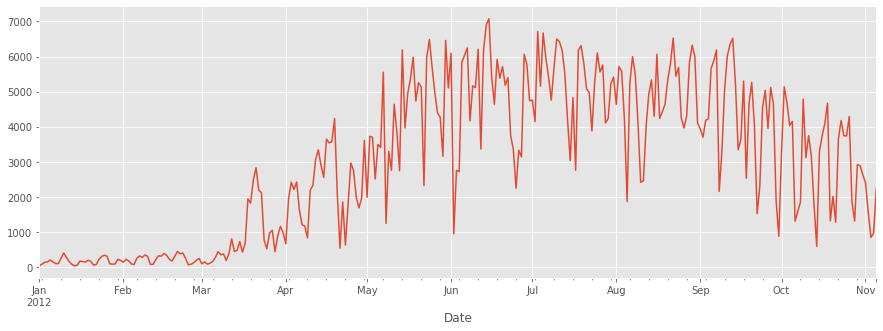

In [67]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

Next up, we're just going to look at the Berri bike path. Berri is a street in Montreal, with a pretty important bike path.

So we're going to create a dataframe with just the Berri bikepath in it

In [5]:
berri_bikes = bikes[['Berri 1']].copy()

In [6]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [7]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [8]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

We actually want the weekday, though:

In [9]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [11]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [15]:
import numpy as np
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [10]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


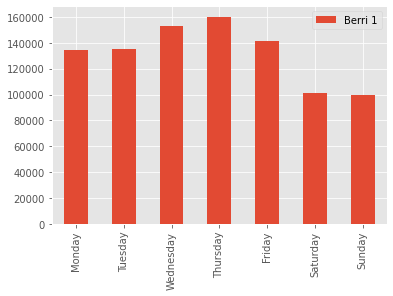

In [11]:
weekday_counts.plot(kind='bar')

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

# 4.3 Putting it together

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing `sum` to `max`, `numpy.median`, or any other function you like.

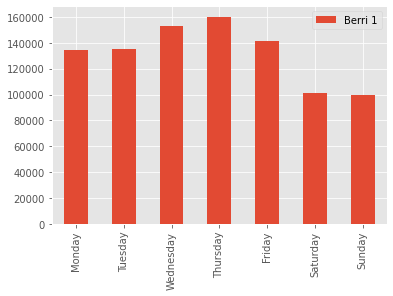

In [12]:
bikes = pd.read_csv('../data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')

# Bonus questions

Question 1: Using a foor loop, calculate the number of journeys taken for each combination of route and day of the week.

In [110]:
def get_counts(colname):
    temp_bikes = bikes[[colname]].copy()
    temp_bikes['weekday'] = temp_bikes.index.weekday

    # Add up the number of cyclists by weekday
    weekday_counts = temp_bikes.groupby('weekday').aggregate(sum)
    weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts = weekday_counts.rename(columns={colname: 'value'})
    weekday_counts['variable'] = colname
    return weekday_counts

dfs = []
for i, col in enumerate(bikes.columns):
    temp = get_counts(col)
    dfs.append(temp)
big_df = pd.concat(dfs)
# big_df.rename_axis("Date").sort_values(by=['Date', 'variable'])
big_df

,value,variable
Monday,134298.0,Berri 1
Tuesday,135305.0,Berri 1
Wednesday,152972.0,Berri 1
Thursday,160131.0,Berri 1
Friday,141771.0,Berri 1
...,...,...
Wednesday,0.0,St-Urbain (données non disponibles)
Thursday,0.0,St-Urbain (données non disponibles)
Friday,0.0,St-Urbain (données non disponibles)
Saturday,0.0,St-Urbain (données non disponibles)


Now use the `pd.melt` function to convert the dataframe from wide to long format, where the columns of the long dataframe are `["Date", "variable, "value"]`, where `variable` denotes the bike route and value indicates the number of cyclists on that route on that date.

In [113]:
bikes_1 = bikes.copy()
bikes_1.reset_index(level=0, inplace=True)
bikes_long = pd.melt(bikes_1, id_vars="Date")
bikes_long

,Date,variable,value
0,2012-01-01,Berri 1,35.0
1,2012-01-02,Berri 1,83.0
2,2012-01-03,Berri 1,135.0
3,2012-01-04,Berri 1,144.0
4,2012-01-05,Berri 1,197.0
...,...,...,...
2785,2012-11-01,St-Urbain (données non disponibles),NaN
2786,2012-11-02,St-Urbain (données non disponibles),NaN
2787,2012-11-03,St-Urbain (données non disponibles),NaN
2788,2012-11-04,St-Urbain (données non disponibles),NaN


After creating a `weekday` column, group by both weekday and variable and use `aggregate` to return a summary of the aggregate number of cyclists using a given route by day of week.

In [ ]:
bikes_long["weekday"] = bikes_long["Date"].dt.day_name()
bikes_summary = bikes_long.groupby(['weekday', 'variable']).aggregate(sum)
bikes_summary.reset_index(inplace=True)
print(bikes_summary)